In [5]:
import pandas as pd

df_weighted_util_3m = pd.DataFrame(
    {
        "CB_WT_CREDIT_UTIL_3M": [0.32, 0.78, 0.15]
    },
    index=[100001, 100002, 100003]
)

df_weighted_util_3m.index.name = "SK_ID_CURR"
df_weighted_util_3m.reset_index(drop=True)

,CB_WT_CREDIT_UTIL_3M
0,0.32
1,0.78
2,0.15


In [1]:
import pandas as pd 
import seaborn as sns
import numpy as np
pd.set_option('display.max_columns',None)
pd.set_option('display.float_format','{:.8}'.format)
from src.constants.data_transformation_constant import *

# APPLICATION DATA

In [13]:
application_train = pd.read_csv(r'D:\home loan credit risk\artifact\raw\application_data.csv',dtype= APPLICATION_DATA_DTYPES_REDUCE)

In [14]:
application_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083036967,0.26294859,0.13937578,0.024700001,0.036899999,0.97219998,0.61919999,0.0143,0.0,0.068999998,0.083300002,0.125,0.036899999,0.020199999,0.018999999,0.0,0.0,0.0252,0.0383,0.97219998,0.63410002,0.0144,0.0,0.068999998,0.083300002,0.125,0.037700001,0.022,0.0198,0.0,0.0,0.025,0.036899999,0.97219998,0.6243,0.0144,0.0,0.068999998,0.083300002,0.125,0.037500001,0.020500001,0.019300001,0.0,0.0,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.31126731,0.62224578,NaN,0.095899999,0.052900001,0.98509997,0.796,0.0605,0.079999998,0.034499999,0.29170001,0.33329999,0.013,0.077299997,0.054900002,0.0038999999,0.0098000001,0.092399999,0.053800002,0.98509997,0.80400002,0.049699999,0.080600001,0.034499999,0.29170001,0.33329999,0.0128,0.079000004,0.055399999,0.0,0.0,0.096799999,0.052900001,0.98509997,0.79869998,0.060800001,0.079999998,0.034499999,0.29170001,0.33329999,0.0132,0.078699999,0.055799998,0.0038999999,0.0099999998,reg oper account,block of flats,0.071400002,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not mar

In [ ]:
application_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float32(58), float64(7), int32(9), int64(4), int8(28), object(16)
memory usage: 150.2+ MB


In [ ]:
# xna values are present in 
# 'CODE_GENDER', 'ORGANIZATION_TYPE'
#handling placeholder values
application_train = application_train.replace(
    { 
    'XNA':np.nan,
    'XAP':np.nan,
    'Unknown':np.nan,
    
})

application_train['DAYS_EMPLOYED'] = application_train['DAYS_EMPLOYED'].replace({
    365243:np.nan
})


In [ ]:
#cleanm name NAME_EDUCATION_TYPE and  'Secondary / secondary special':'Secondary education'
application_train['NAME_EDUCATION_TYPE'] = application_train['NAME_EDUCATION_TYPE'].replace({
    'Secondary / secondary special':'Secondary education'
})

#cleanm name family status and assign single instead of single / not married
application_train['NAME_FAMILY_STATUS'] = application_train['NAME_FAMILY_STATUS'].replace({
    'Single / not married': 'Single'
})

application_train['NAME_HOUSING_TYPE'] = application_train['NAME_HOUSING_TYPE'].replace({
    'House / apartment': 'Owned'
})

#remove the days employed,days_birth,days_employed extreme correlated

application_train['YEARS_AGE'] = round(-application_train['DAYS_BIRTH'] / 365,2)
application_train['YEARS_EMPLOYED'] = round(-application_train['DAYS_EMPLOYED'] / 365,2)
application_train['YEARS_REGISTRATION'] = round(-application_train['DAYS_REGISTRATION'] / 365,2)
application_train['YEARS_ID_PUBLISH'] =  round(-application_train['DAYS_ID_PUBLISH'] / 365,2)

In [ ]:
# 365243 is the value used ofor the null values i think it is placeholder
application_train[application_train['YEARS_EMPLOYED'] <-999][['YEARS_EMPLOYED','DAYS_EMPLOYED']].head()

,YEARS_EMPLOYED,DAYS_EMPLOYED


In [ ]:
application_train['YEARS_EMPLOYED'] = application_train['YEARS_EMPLOYED'].replace(-0.0,0.0)
    
application_train['YEARS_REGISTRATION'] = application_train['YEARS_REGISTRATION'].replace(-0.0,0.0)

In [ ]:
application_train['DAYS_EMPLOYED'].max()

np.float64(0.0)

In [ ]:
application_train.drop(columns=['DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH'],inplace=True)
application_train['YEARS_AGE'] = application_train['YEARS_AGE'].astype('float32')
application_train['YEARS_EMPLOYED'] = application_train['YEARS_EMPLOYED'].astype('float32')
application_train['YEARS_REGISTRATION'] = application_train['YEARS_REGISTRATION'].astype('float32')
application_train['YEARS_ID_PUBLISH'] = application_train['YEARS_ID_PUBLISH'].astype('float32')

In [ ]:
application_train['YEARS_AGE'].astype('float32').info()

<class 'pandas.core.series.Series'>
RangeIndex: 307511 entries, 0 to 307510
Series name: YEARS_AGE
Non-Null Count   Dtype  
--------------   -----  
307511 non-null  float32
dtypes: float32(1)
memory usage: 1.2 MB


In [ ]:
#code for checking if any placeholder exist in feature

temp = []

for feature in application_train.select_dtypes(include=['object','category','bool']).columns.tolist():
    if application_train[feature].str.contains('XNA').any():
        temp.append(feature)
print(temp)

[]


In [ ]:
application_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,YEARS_AGE,YEARS_EMPLOYED,YEARS_REGISTRATION,YEARS_ID_PUBLISH
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary education,Single,Owned,0.018801,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083036967,0.26294859,0.13937578,0.024700001,0.036899999,0.97219998,0.61919999,0.0143,0.0,0.068999998,0.083300002,0.125,0.036899999,0.020199999,0.018999999,0.0,0.0,0.0252,0.0383,0.97219998,0.63410002,0.0144,0.0,0.068999998,0.083300002,0.125,0.037700001,0.022,0.0198,0.0,0.0,0.025,0.036899999,0.97219998,0.6243,0.0144,0.0,0.068999998,0.083300002,0.125,0.037500001,0.020500001,0.019300001,0.0,0.0,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,25.92,1.75,9.9899998,5.8099999
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,Owned,0.003541,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.31126731,0.62224578,NaN,0.095899999,0.052900001,0.98509997,0.796,0.0605,0.079999998,0.034499999,0.29170001,0.33329999,0.013,0.077299997,0.054900002,0.0038999999,0.0098000001,0.092399999,0.053800002,0.98509997,0.80400002,0.049699999,0.080600001,0.034499999,0.29170001,0.33329999,0.0128,0.079000004,0.055399999,0.0,0.0,0.096799999,0.052900001,0.98509997,0.79869998,0.060800001,0.079999998,0.034499999,0.29170001,0.33329999,0.0132,0.078699999,0.055799998,0.0038999999,0.0099999998,reg oper account,block of flats,0.071400002,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,45.93,3.25,3.25,0.80000001
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary education,Single,Owned,0.010032,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,

In [ ]:
from prettytable import PrettyTable
table = PrettyTable()
table.field_names = ['feature' , 'min', 'max']

for feature in application_train.select_dtypes(exclude=['object','category','bool']).columns.tolist():
    temp_min = application_train[feature].min()
    temp_max = application_train[feature].max()
    table.add_row([feature,temp_min,temp_max])

In [ ]:
#print(table)

# BUREAU DATASET

In [17]:
import pandas as pd
import numpy as np

In [18]:
bureau_dtypes ={
    'DAYS_CREDIT':'int16',
    'CREDIT_DAY_OVERDUE':'int16',
    'CNT_CREDIT_PROLONG':'int16',
    
    'DAYS_CREDIT_UPDATE':'int32',
    
    'DAYS_CREDIT_ENDDATE':'float32',
    'DAYS_ENDDATE_FACT':'float32',
}

In [19]:
bureau = pd.read_csv(r'D:\home loan credit risk\artifact\raw\bureau.csv',dtype=bureau_dtypes)

In [4]:
bureau = bureau.sort_values(by='SK_ID_CURR')

In [116]:
bureau.head()

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
248485,100001,5896631,Closed,currency 1,-909,0,-179.0,-877.0,NaN,0,279720.0,0.0,0.0,0.0,Consumer credit,-155,0.0
248484,100001,5896630,Closed,currency 1,-857,0,-492.0,-553.0,NaN,0,112500.0,0.0,0.0,0.0,Consumer credit,-155,0.0
248490,100001,5896636,Active,currency 1,-320,0,411.0,NaN,NaN,0,168345.0,110281.5,NaN,0.0,Consumer credit,-10,9364.5
248487,100001,5896633,Closed,currency 1,-1572,0,-1329.0,-1328.0,NaN,0,85500.0,0.0,0.0,0.0,Consumer credit,-155,0.0
248486,100001,5896632,Closed,currency 1,-879,0,-514.0,-544.0,NaN,0,91620.0,0.0,0.0,0.0,Consumer credit,-155,0.0


In [8]:
bureau['CREDIT_TYPE'].value_counts()

CREDIT_TYPE
Consumer credit                                 1251615
Credit card                                      402195
Car loan                                          27690
Mortgage                                          18391
Microloan                                         12413
Loan for business development                      1975
Another type of loan                               1017
Unknown type of loan                                555
Loan for working capital replenishment              469
Cash loan (non-earmarked)                            56
Real estate loan                                     27
Loan for the purchase of equipment                   19
Loan for purchase of shares (margin lending)          4
Interbank credit                                      1
Mobile operator loan                                  1
Name: count, dtype: int64

#### NUM_CREDIT_CURRENCIES

In [125]:
feature_df = bureau.groupby(by='SK_ID_CURR')['CREDIT_CURRENCY'].nunique().to_frame('NUM_CREDIT_CURRENCIES')
# this feature have 99% currency 1 values 

#### TIME FRAMED FEATURE NUM_ACTIVE_CREDIT

In [20]:

time_frames = [90, 180, 270, 360, 720]

# empty dataframe to apend the feature into
features_df = pd.DataFrame()


for frame in time_frames:
    filt = bureau['DAYS_CREDIT'] >= -frame
    temp = bureau.loc[filt].copy()

    crosstab = pd.crosstab(temp['SK_ID_CURR'],temp['CREDIT_ACTIVE'])
        


    active_credit = crosstab.get('Active', pd.Series(0, index=crosstab.index)).to_frame(f'B_NUM_ACTIVE_CREDIT_{frame}D')
    if features_df.empty:
        features_df = active_credit.copy()
    else:
        features_df = features_df.join(active_credit,how='outer')
features_df = features_df.fillna(0)

In [21]:
features_df

,B_NUM_ACTIVE_CREDIT_90D,B_NUM_ACTIVE_CREDIT_180D,B_NUM_ACTIVE_CREDIT_270D,B_NUM_ACTIVE_CREDIT_360D,B_NUM_ACTIVE_CREDIT_720D
SK_ID_CURR,,,,,
100001,1.0,1.0,1.0,2.0,3
100002,0.0,1.0,1.0,1.0,1
100003,0.0,0.0,0.0,0.0,1
100004,0.0,0.0,0.0,0.0,0
100005,1.0,2.0,2.0,2.0,2
...,...,...,...,...,...
456246,0.0,1.0,1.0,1.0,1
456247,0.0,0.0,0.0,2.0,3
456249,0.0,0.0,0.0,0.0,1


In [59]:
features_df.head()

,NUM_ACTIVE_CREDIT_90D,NUM_ACTIVE_CREDIT_180D,NUM_ACTIVE_CREDIT_270D,NUM_ACTIVE_CREDIT_360D,NUM_ACTIVE_CREDIT_720D
SK_ID_CURR,,,,,
100001,1.0,1.0,1.0,2.0,3
100002,0.0,1.0,1.0,1.0,1
100003,0.0,0.0,0.0,0.0,1
100004,0.0,0.0,0.0,0.0,0
100005,1.0,2.0,2.0,2.0,2


#### DAYS_SINCE_LAST_BAD_LOAN

In [72]:


bureau['CREDIT_ACTIVE'].unique()
filt = bureau['CREDIT_ACTIVE'].isin(['Bad debt','Sold'])
temp = bureau.loc[filt].copy()
features_df = temp.groupby(by='SK_ID_CURR')['DAYS_CREDIT'].max().to_frame('DAYS_SINCE_LAST_BAD_LOAN')
# converting it into positive number so i can use the -99999 placeholder later for the null values
features_df['DAYS_SINCE_LAST_BAD_LOAN'] = -features_df['DAYS_SINCE_LAST_BAD_LOAN']

all_ids = bureau['SK_ID_CURR'].unique() 
features_df = features_df.reindex(all_ids,fill_value=0)

features_df

,DAYS_SINCE_LAST_BAD_LOAN
SK_ID_CURR,
100001,0
100002,0
100003,0
100004,0
100005,0
...,...
456249,0
456250,0
456253,0



#### CREDIT_DAY_OVERDUE

In [ ]:
# HAS_CREDIT_DAYS_OVERDUE 

In [ ]:
filt = bureau['CREDIT_DAY_OVERDUE'] != 0

In [ ]:
bureau['HAS_CREDIT_DAYS_OVERDUE'] = 0

In [ ]:
bureau.loc[filt,'HAS_CREDIT_OVERDUE'] = 1

In [ ]:
filt = bureau['CREDIT_DAY_OVERDUE'].isnull()
bureau.loc[filt,'HAS_CREDIT_DAYS_OVERDUE'] = np.nan

In [ ]:
bureau.groupby('SK_ID_CURR')['HAS_CREDIT_DAYS_OVERDUE'].max().to_frame()

,HAS_CREDIT_DAYS_OVERDUE
SK_ID_CURR,
100001,0.0
100002,0.0
100003,0.0
100004,0.0
100005,0.0
...,...
456249,0.0
456250,0.0
456253,0.0


In [ ]:
bureau.head()

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY,RECENT_CREDIT_FLAG_90D,NUM_ACTIVE_CREDIT_180D,HAS_CREDIT_DAYS_OVERDUE,HAS_CREDIT_OVERDUE
0,100001,5896631,Closed,currency 1,-909,0,-179.0,-877.0,NaN,0,279720.0,0.0,0.0,0.0,Consumer credit,-155,0.0,0.0,1.0,0.0,NaN
1,100001,5896630,Closed,currency 1,-857,0,-492.0,-553.0,NaN,0,112500.0,0.0,0.0,0.0,Consumer credit,-155,0.0,0.0,1.0,0.0,NaN
2,100001,5896636,Active,currency 1,-320,0,411.0,NaN,NaN,0,168345.0,110281.5,NaN,0.0,Consumer credit,-10,9364.5,0.0,1.0,0.0,NaN
3,100001,5896633,Closed,currency 1,-1572,0,-1329.0,-1328.0,NaN,0,85500.0,0.0,0.0,0.0,Consumer credit,-155,0.0,0.0,1.0,0.0,NaN
4,100001,5896632,Closed,currency 1,-879,0,-514.0,-544.0,NaN,0,91620.0,0.0,0.0,0.0,Consumer credit,-155,0.0,0.0,1.0,0.0,NaN


In [76]:
bureau[bureau['CREDIT_DAY_OVERDUE'] !=0]

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
335223,100120,6410975,Active,currency 1,-610,55,486.0,NaN,NaN,0,112500.0,0.0,0.0,166.50,Credit card,-72,NaN
409726,100162,6131362,Active,currency 1,-1998,1272,-546.0,NaN,NaN,0,82768.5,NaN,NaN,13.50,Consumer credit,-1272,14882.85
1260072,100341,6813780,Active,currency 1,-333,161,1042.0,NaN,NaN,0,67500.0,0.0,0.0,459.00,Credit card,-33,NaN
309420,100349,5857962,Active,currency 1,-301,25,1526.0,NaN,19359.00,0,675000.0,NaN,NaN,19359.00,Consumer credit,-28,22054.50
1574133,100472,5758490,Active,currency 1,-197,64,1264.0,NaN,18920.25,0,900000.0,874039.5,0.0,18920.25,Consumer credit,-44,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1015601,455858,5133299,Active,currency 1,-1245,1205,-179.0,NaN,NaN,0,900000.0,861273.0,0.0,522.00,Consumer credit,-1128,NaN
780713,455865,6268736,Active,currency 1,-742,10,719.0,NaN,NaN,0,900000.0,NaN,NaN,477.00,Consumer credit,-9,0.00
1667096,455988,5599250,Active,currency 1,-349,46,-46.0,NaN,NaN,0,66420.0,0.0,0.0,9.00,Consumer credit,-45,NaN
413796,456112,5970967,Active,currency 1,-93,31,272.0,NaN,NaN,0,30874.5,26532.0,0.0,13.50,Consumer credit,-22,0.00


#### DAYS_CREDIT_ENDDATE & days_enddate_fact

In [ ]:
# days_credit_enddatae
#    expected end date of the loan/credit    
#    avg credit enddate if the loan is active !!
# days_enddate_fact
#        - actual end date when the loan was closed/terminated,
#        filt on loans =='closed'
#        AVG_CREDIT_REPAYMENT_DIFF = DAYS_ENDDATE_FACT - DAYS_CREDIT_ENDDATE take mean for the per
#        
#           Negative value: Loan was repaid early → indicates good financial behavior.
#           Positive value: Loan was repaid late → possible financial stress or delay.
#

In [16]:
filt = bureau['CREDIT_ACTIVE'] == 'Closed'

bureau.loc[filt,'REPAYMENT_DAYS_DIFF'] = bureau['DAYS_ENDDATE_FACT'] - bureau['DAYS_CREDIT_ENDDATE']

features_df = bureau.groupby(by='SK_ID_CURR')['REPAYMENT_DAYS_DIFF'].agg(
    AVG_REPAYMENT_DAYS_DIFF = 'mean',
    MAX_REPAYMENT_DAYS_DIFF = 'max' )

features_df

AVG_REPAYMENT_DAYS_DIFF    39665
MAX_REPAYMENT_DAYS_DIFF    39665
dtype: int64

In [14]:
features_df

,AVG_CREDIT_REPAYMENT_DIFF
SK_ID_CURR,
100001,-197.000000
100002,-252.600006
100003,34.000000
100004,-44.000000
100005,5.000000
...,...
456249,-11.400000
456250,-488.000000
456253,-605.000000


#### AMT_CREDIT_MAX_OVERDUE    

In [ ]:
# HAS_OVERDUE: create flag featur FLAG_HAS_AMT_OVERDUE
 
bureau['FLAG_HAS_AMT_OVERDUE'] = np.where(
    bureau['AMT_CREDIT_MAX_OVERDUE'] > 0,
    1,
    0
)
filt = bureau['AMT_CREDIT_MAX_OVERDUE'].isnull()
bureau.loc[filt,'FLAG_HAS_AMT_OVERDUE'] = np.nan


In [ ]:
features_df = bureau.groupby(by='SK_ID_CURR')['FLAG_HAS_AMT_OVERDUE'].max().to_frame()
features_df

,FLAG_HAS_AMT_OVERDUE
SK_ID_CURR,
100001,NaN
100002,1.0
100003,0.0
100004,0.0
100005,0.0
...,...
456249,1.0
456250,0.0
456253,NaN


#### MAX_CREDIT_PROLONG

In [ ]:
features_df = bureau.groupby(by='SK_ID_CURR')['CNT_CREDIT_PROLONG'].max().to_frame('MAX_CREDIT_PROLONG')


,MAX_CREDIT_PROLONG
SK_ID_CURR,
100001,0
100002,0
100003,0
100004,0
100005,0
...,...
456249,0
456250,0
456253,0


#### CNT_CREDIT_PROLONG

In [ ]:
#FLAG_HAS_CREDIT_PROLONG
bureau['FLAG_HAS_CREDIT_PROLONG'] = np.where(
    bureau['CNT_CREDIT_PROLONG'].isnull(),
    np.nan,
    (bureau['CNT_CREDIT_PROLONG'] > 0).astype(int)
)

In [ ]:
features_df =bureau.groupby(by='SK_ID_CURR')['FLAG_HAS_CREDIT_PROLONG'].max().to_frame()

#### AMT_CREDIT_SUM

In [ ]:
# DEBT_TO_LOAN_RATIO
# AVG_AMT_CREDIT_SUM

In [4]:
# Create DEBT_TO_LOAN_RATIO
bureau['DEBT_TO_LOAN_RATIO'] = np.where(
    (bureau['CREDIT_ACTIVE'] == 'Active') & (bureau['AMT_CREDIT_SUM'] != 0),
    bureau['AMT_CREDIT_SUM_DEBT'] / bureau['AMT_CREDIT_SUM'],
    0
)

filt = (bureau['AMT_CREDIT_SUM'].isnull()) | (bureau['AMT_CREDIT_SUM_DEBT'].isnull())

# Replace with NaN
bureau.loc[filt, 'DEBT_TO_LOAN_RATIO'] = np.nan


<Axes: ylabel='AMT_CREDIT_SUM'>

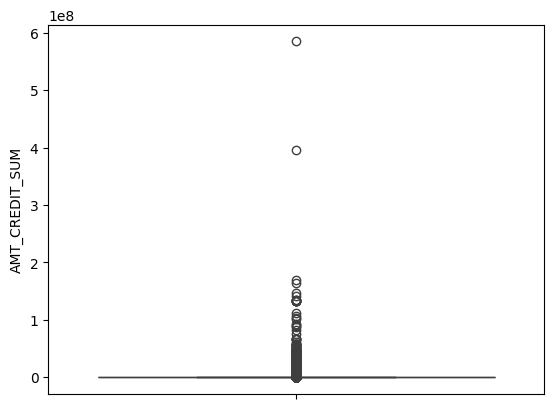

In [9]:
import seaborn as sns
sns.boxplot(bureau['AMT_CREDIT_SUM'])

In [5]:
features_df = bureau.groupby(by='SK_ID_CURR')['DEBT_TO_LOAN_RATIO'].mean().to_frame()

In [6]:
features_df

,DEBT_TO_LOAN_RATIO
SK_ID_CURR,
100001,0.282518
100002,0.109236
100003,0.000000
100004,0.000000
100005,0.601256
...,...
456249,0.090595
456250,0.575079
456253,0.299308


In [ ]:
# avg loan amount of previous all options!
features_df = bureau.groupby(by='SK_ID_CURR')['AMT_CREDIT_SUM'].mean().to_frame()
features_df = features_df.rename(columns={'AMT_CREDIT_SUM':'AVG_AMT_CREDIT_SUM'})

#### CREDIT_TYPE

In [ ]:
# HAS_CREDIT_LOAN

In [ ]:
bureau['HAS_CREDIT_LOAN'] = np.where(
    bureau['CREDIT_TYPE'] == 'Credit card',
    1,
    0
)
filt = bureau['CREDIT_TYPE'].isnull()
bureau.loc[filt,'HAS_CREDIT_LOAN'] = np.nan

In [ ]:
bureau['HAS_CREDIT_LOAN'].value_counts()

HAS_CREDIT_LOAN
0.0    1314233
1.0     402195
Name: count, dtype: int64

In [ ]:
features_df = bureau.groupby('SK_ID_CURR')['HAS_CREDIT_LOAN'].max().to_frame()

# BUREAU BALANCE

#### STATUS

In [ ]:
 # MAX_DPD features?

In [1]:
bureau_balance_dtypes = {
    'SK_ID_BUREAU':'int32',
    'MONTHS_BALANCE':'int16',
}

In [2]:
import pandas as pd
import numpy as np

df = pd.read_csv(r'D:\home loan credit risk\artifact\raw\bureau_balance.csv',dtype=bureau_balance_dtypes)

In [7]:
df

,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
0,5715448,0,0.0
1,5715448,-1,0.0
2,5715448,-2,0.0
3,5715448,-3,0.0
4,5715448,-4,0.0
...,...,...,...
27299920,5041336,-47,NaN
27299921,5041336,-48,NaN
27299922,5041336,-49,NaN
27299923,5041336,-50,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27299925 entries, 0 to 27299924
Data columns (total 3 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   SK_ID_BUREAU    int32 
 1   MONTHS_BALANCE  int16 
 2   STATUS          object
dtypes: int16(1), int32(1), object(1)
memory usage: 364.5+ MB


In [4]:
dpd_map = {'X':np.nan,'C':0,'1':1,'2':2,'3':3,'4':4,'5':5}
df['STATUS'] = df['STATUS'].map(dpd_map)

#### WORST_DPD_TIMEFRAMED Features

In [13]:
df[df['SK_ID_BUREAU']==5001711]

,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
2846399,5001711,0,NaN
2846400,5001711,-1,NaN
2846401,5001711,-2,NaN
2846402,5001711,-3,NaN


In [15]:

time_frames = [3, 6, 9, 12, 24, 36,72,96]
# empty dataframe to apend the feature into
features_df = pd.DataFrame()
for frame in time_frames:
    filt = df['MONTHS_BALANCE'] >= -frame
    temp = df.loc[filt].copy()
    feature_dpd = temp.groupby(by='SK_ID_BUREAU')['STATUS'].max().to_frame(f'WORST_DPD_{frame}M')
    
    if features_df.empty:
        features_df = feature_dpd
    else:
       features_df =  features_df.join(feature_dpd,how='outer')
features_df = features_df.fillna(-88888)


In [16]:
features_df

,WORST_DPD_3M,WORST_DPD_6M,WORST_DPD_9M,WORST_DPD_12M,WORST_DPD_24M,WORST_DPD_36M,WORST_DPD_72M,WORST_DPD_96M
SK_ID_BUREAU,,,,,,,,
5001709,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5001710,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5001711,-88888.0,-88888.0,-88888.0,-88888.0,-88888.0,-88888.0,-88888.0,-88888.0
5001712,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5001713,-88888.0,-88888.0,-88888.0,-88888.0,-88888.0,-88888.0,-88888.0,-88888.0
...,...,...,...,...,...,...,...,...
6842884,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6842885,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0
6842886,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### SEVERE_DPD_TIMEFRAMED Features

In [1]:

time_frames = [12,24,36,72]
# empty dataframe to apend the feature into
features_df = pd.DataFrame()
for frame in time_frames:
    filt = (df['MONTHS_BALANCE'] >= -frame) & (df['STATUS'] >= 3)
    temp = df.loc[filt].copy()
    feature_dpd = temp.groupby(by='SK_ID_BUREAU')['STATUS'].max().to_frame(f'SEVERE_DPD_{frame}M')
    
    if features_df.empty:
        features_df = feature_dpd
    else:
       features_df =  features_df.join(feature_dpd,how='outer')
       


NameError: name 'pd' is not defined

#### RECENT_MONTH_OF_DPD

In [93]:
filt = df['STATUS'] > 0
temp = df.loc[filt].copy()
features_df = temp.groupby(by='SK_ID_BUREAU')['MONTHS_BALANCE'].max().to_frame('RECENT_MONTH_OF_DPD')

In [98]:
features_df.columns.to_list()

['RECENT_MONTH_OF_DPD']

In [70]:
features_df.notnull().sum()

WORST_DPD_3M     0
WORST_DPD_6M     0
WORST_DPD_9M     0
WORST_DPD_12M    0
WORST_DPD_24M    0
WORST_DPD_36M    0
WORST_DPD_72M    0
WORST_DPD_96M    0
dtype: int64

# PREVIOUS APPLICATION 

In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns',None)

In [2]:
PREVIOUS_APPLICATION_REDUCE_DTYPES ={
    'HOUR_APPR_PROCESS_START':'int16',
    'NFLAG_LAST_APPL_IN_DAY	':'int8',


    'RATE_DOWN_PAYMENT':'float32',
    'RATE_INTEREST_PRIMARY':'float32',
    'RATE_INTEREST_PRIVILEGED':'float32',


    'DAYS_DECISION':'int32',
    'SELLERPLACE_AREA':'int32',


    'CNT_PAYMENT':'float32',
    'DAYS_FIRST_DRAWING':'float32',
    'DAYS_FIRST_DUE':'float32',
    'DAYS_LAST_DUE_1ST_VERSION':'float32',
    'DAYS_LAST_DUE':'float32',
    'DAYS_TERMINATION':'float32',
    'NFLAG_INSURED_ON_APPROVAL':'float32'
    
}
df = pd.read_csv(r'D:\home loan credit risk\artifact\raw\previous_application.csv',dtype=PREVIOUS_APPLICATION_REDUCE_DTYPES)

In [26]:
temp = pd.crosstab(df['SK_ID_CURR'],df['NAME_CONTRACT_STATUS'],dropna=False)
temp['TOTAL_LOANS'] = temp.get('Approved', 0) + temp.get('Refused', 0)

temp['RATIO_REFUSED_LOANS'] = temp['Refused'] / temp['TOTAL_LOANS']
temp['RATIO_APPROVED_LOANS'] = temp['Approved'] / temp['TOTAL_LOANS']

In [ ]:
    
def handle_ratio_num_den_filt(df, numerator , denominator,feature_name):  
    ''' helper function'''
    df[feature_name] = np.select(condlist=[
                df[numerator].isna() & df[denominator].isna(),
                df[denominator].isna(),
                df[numerator].isna()
                ],
                choicelist=[
                    -9999999999,
                    -888888888,
                    -7777777777777
                ],
                default = df[numerator] / df[denominator] 
                )
    return df[feature_name].to_frame()

features_1 = handle_ratio_num_den_filt(temp,'Refused','TOTAL_LOANS','PA_RATIO_REFUSED_LOANS')


In [ ]:
df[df['SK_ID_PREV']==1441861]

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
1075445,1441861,269225,Cash loans,35026.47,1035000.0,1155226.5,NaN,1035000.0,FRIDAY,16,Y,1,NaN,NaN,NaN,XNA,Approved,-294,Cash through the bank,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Credit and cash offices,0,XNA,48.0,low_action,Cash X-Sell: low,365243.0,-264.0,1146.0,365243.0,365243.0,1.0


In [3]:
df = df.sort_values(by='SK_ID_PREV')

In [11]:
df['NAME_YIELD_GROUP'].value_counts()

NAME_YIELD_GROUP
XNA           517215
middle        385532
high          353331
low_normal    322095
low_action     92041
Name: count, dtype: int64

In [11]:
filt = df['NAME_PORTFOLIO'] =='Credit'
filt_df = df.loc[filt].copy()

filt_df['SK_ID_CURR'] =  filt_df['SK_ID_CURR'].unique()
filt_df

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL


<Axes: xlabel='DAYS_TERMINATION', ylabel='Density'>

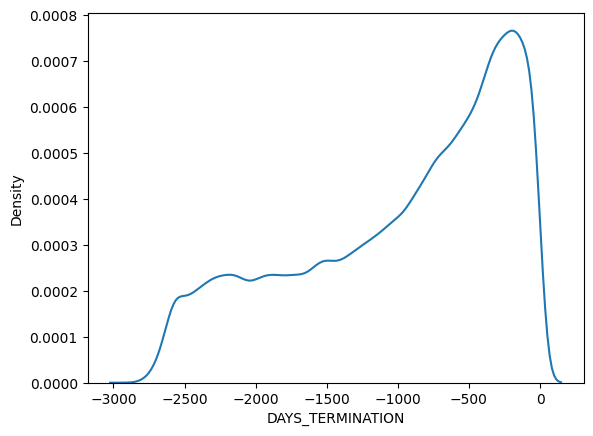

In [37]:
import seaborn as sns
adef = df[df['DAYS_TERMINATION'] != 365243.0]['DAYS_TERMINATION']
sns.kdeplot(adef)

In [9]:
df[df['NAME_CONTRACT_TYPE'] == 'Consumer loans']['NAME_PORTFOLIO'].value_counts()

NAME_PORTFOLIO
POS     691011
XNA      37715
Cars       425
Name: count, dtype: int64

In [10]:
df[df['NAME_CONTRACT_TYPE'] == 'Cash loans']['NAME_PORTFOLIO'].value_counts()

NAME_PORTFOLIO
Cash    461563
XNA     285990
Name: count, dtype: int64

In [11]:
df[df['NAME_CONTRACT_TYPE'] == 'Revolving loans']['NAME_PORTFOLIO'].value_counts()

NAME_PORTFOLIO
Cards    144985
XNA       48179
Name: count, dtype: int64

In [18]:
df['NAME_CONTRACT_TYPE'].value_counts()

NAME_CONTRACT_TYPE
Cash loans         747553
Consumer loans     729151
Revolving loans    193164
XNA                   346
Name: count, dtype: int64

In [124]:
# avg prev_amt_annuity
# avg_amt_credit
# credit_to_application_ratio = AMT_CREDIT / AMT_APPLICATION
# RATE_DOWN_PAYMENT
    #down_payment_ratio =  AMT_DOWN_PAYMENT  /aAMT_GOODS_PRICE avg then
    #used direct feature present in the dataset
# prev_avg_amt_goods_price
# FLAG_HAD_RATE_INTEREST_PRIVILEGED  create a flag if the client had get the previllaged
# NAME_CONTRACT_STATUS
        # num_refused_loans
        # flag_all_approved_loans
# num_loans_refused last 180 days &  D num_loans_refused last 60 days 
# fLAG_HC_REJECT_REASON
# 'SUM_SCO_SCOFR_REJECT_REASON'
#NAME_TYPE_SUITE is_alone 
# flag_repeater FLAG_NEW_CLIENT
#NAME_PORTFOLIO  had_cash_loans?
# channel_high_risk_flag = [AP+ (Cash loan),Contact cente] applied online CHANNEL_TYPE
# RATIO_HIGH_YIELD_LOANS'
# RATIO_INSURED_LOANS
# loan_delay df['DAYS_TERMINATION'] - df['DAYS_LAST_DUE_1ST_VERSION'] placeholder 365243.0     check for more
        #MEAN_LOAN_REPAYMENT_DIFF
        #MAX_LOAN_REPAYMENT_DIFF

In [5]:
# data cleaning FLAG_LAST_APPL_PER_CONTRACT remove the rows with the Y then do feature transformation
# remvove it check firest values counts then NFLAG_LAST_APPL_IN_DAY

# remove the RATE_INTEREST_PRIMARY too much nan values and values are less present

# NAME_CASH_LOAN_PURPOSE have more xna and xap values nad other categories have high cardinty handle in future
# NAME_GOODS_CATEGORY remove for now
# SELLERPLACE_AREA , NAME_SELLER_INDUSTRY remove now add later

#365243.0     placeholder DAYS_FIRST_DRAWING

#### AVG_AMT_ANNUITY_CLIENT


In [20]:
# amt annuity means the regular installmetns for that loan per prev_id per month/or selected window
feature_df = df.groupby(by='SK_ID_CURR')['AMT_ANNUITY'].mean().to_frame()
feature_df = feature_df.rename(columns={'AMT_ANNUITY':'AVG_AMT_ANNUITY_CLIENT'})

#### AVG_AMT_CREDIT_CLIENT


In [4]:
# AMT_CREDIT means the actual amount of loan the client gets approved
feature_df = df.groupby(by='SK_ID_CURR')['AMT_CREDIT'].mean().to_frame()
feature_df = feature_df.rename(columns={'AMT_CREDIT':'AVG_AMT_CREDIT_CLIENT'})

#### AVG_CREDIT_APPLICATION_RATIO = AMT_CREDIT / AMT_APPLICATION


In [39]:
df['CREDIT_APPLICATION_RATIO'] = df['AMT_CREDIT'] / df['AMT_APPLICATION']
feature_df = df.groupby(by='SK_ID_CURR')['CREDIT_APPLICATION_RATIO'].mean().to_frame()
feature_df = feature_df.rename(columns={'CREDIT_APPLICATION_RATIO':'AVG_CREDIT_APPLICATION_RATIO'})


#### AVG_DOWN_PAYMENT_RATE

In [55]:
feature_df =  df.groupby(by='SK_ID_CURR')['RATE_DOWN_PAYMENT'].mean().to_frame()
feature_df = feature_df.rename(columns={'RATE_DOWN_PAYMENT':'AVG_DOWN_PAYMENT_RATE'})

#### AVG_AMT_GOODS_PRICE


In [63]:
feature_df = df.groupby(by='SK_ID_CURR')['AMT_GOODS_PRICE'].mean().to_frame()
feature_df = feature_df.rename(columns={'AMT_GOODS_PRICE':'AVG_AMT_GOODS_PRICE'})


#### AVG_FLAG_RATE_INTEREST_PRIVILEGED IVILEGED

In [9]:
import numpy as np
df['FLAG_HAD_RATE_INTEREST_PRIVILEGED'] = np.where( df['RATE_INTEREST_PRIVILEGED'] > 0 ,
                    1,
                    0)
feature_df = df.groupby(by='SK_ID_CURR')['FLAG_HAD_RATE_INTEREST_PRIVILEGED'].mean().to_frame()
feature_df = feature_df.rename(columns={'FLAG_HAD_RATE_INTEREST_PRIVILEGED':'AVG_FLAG_RATE_INTEREST_PRIVILEGED'})
feature_df

,AVG_FLAG_RATE_INTEREST_PRIVILEGED
SK_ID_CURR,
100001,0.0
100002,0.0
100003,0.0
100004,0.0
100005,0.0
...,...
456251,0.0
456252,0.0
456253,0.0


In [7]:
df

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL,FLAG_HAD_RATE_INTEREST_PRIVILEGED
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.000000,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0,1
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0,0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0,0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0,0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1670209,2300464,352015,Consumer loans,14704.290,267295.5,311400.0,0.0,267295.5,WEDNESDAY,12,Y,1,0.000000,NaN,NaN,XAP,Approved,-544,Cash through the bank,XAP,NaN,Refreshed,Furniture,POS,XNA,Stone,43,Furniture,30.0,low_normal,POS industry with interest,365243.0,-508.0,362.0,-358.0,-351.0,0.0,0
1670210,2357031,334635,Consumer loans,6622.020,87750.0,64291.5,29250.0,87750.0,TUESDAY,15,Y,1,0.340554,NaN,NaN,XAP,Approved,-1694,Cash through the bank,XAP,Unaccompanied,New,Furniture,POS,XNA,Stone,43,Furniture,12.0,middle,POS industry with interest,365243.0,-1604.0,-1274.0,-1304.0,-1297.0,0.0,0
1670211,2659632,249544,Consumer loans,11520.855,105237.0,102523.5,10525.5,105237.0,MONDAY,12,Y,1,0.101401,NaN,NaN,XAP,Approved,-1488,Cash through the bank,XAP,"Spouse, partner",Repeater,Consumer Electronics,POS,XNA,Country-wide,1370,Consumer electronics,10.0,low_normal,POS household with interest,365243.0,-1457.0,-1187.0,-1187.0,-1181.0,0.0,0
1670212,2785582,400317,Cash loans,18821.520,180000.0,191880.0,NaN,180000.0,WEDNESDAY,9,Y,1,NaN,NaN,NaN,XNA,Approved,-1185,Cash through the bank,XAP,Family,Repeater,XNA,Cash,x-sell,AP+ (Cash loan),-1,XNA,12.0,low_normal,Cash X-Sell: low,365243.0,-1155.0,-825.0,-825.0,-817.0,1.0,0


#### RATIO_REFUSED_LOANS

In [9]:
temp = pd.crosstab(df['SK_ID_CURR'],df['NAME_CONTRACT_STATUS'],dropna=False)
temp['TOTAL_LOANS']=temp[['Approved','Refused']].sum(axis=1)

In [13]:

temp['RATIO_REFUSED_LOANS'] = temp['Refused'] / temp['TOTAL_LOANS']
feature_df = temp['RATIO_REFUSED_LOANS'].fillna(0).to_frame('RATIO_REFUSED_LOANS')

#### LOANS_REFUSED_RECENT_180D 

In [118]:
filt = ((df['DAYS_DECISION'] > -180) & (df['NAME_CONTRACT_STATUS'] == 'Refused'))

temp = df.loc[filt]

feature_df = temp.groupby(by='SK_ID_CURR')['SK_ID_PREV'].nunique().to_frame()
feature_df = feature_df.rename(columns={'SK_ID_PREV':'LOANS_REFUSED_RECENT_180D'})


all_cust_index = df['SK_ID_CURR'].sort_values().unique()
feature_df = feature_df.reindex(all_cust_index,fill_value=0)

#### LOANS_REFUSED_RECENT_60D

In [43]:
filt = ((df['DAYS_DECISION'] > -60) & (df['NAME_CONTRACT_STATUS'] == 'Refused'))

temp = df.loc[filt]

feature_df = temp.groupby(by='SK_ID_CURR')['SK_ID_PREV'].nunique().to_frame()
feature_df = feature_df.rename(columns={'SK_ID_PREV':'LOANS_REFUSED_RECENT_60D'})

all_cust_index = df['SK_ID_CURR'].sort_values().unique()
feature_df = feature_df.reindex(all_cust_index,fill_value=0)


#### FLAG_HC_REJECT_REASON_2Y 

In [16]:
df['CODE_REJECT_REASON'].value_counts()

CODE_REJECT_REASON
XAP       1353093
HC         175231
LIMIT       55680
SCO         37467
CLIENT      26436
SCOFR       12811
XNA          5244
VERIF        3535
SYSTEM        717
Name: count, dtype: int64

In [14]:

filt = (df['DAYS_DECISION'] > -90)
#filt = (df['DAYS_DECISION'] > -730)

temp = df.loc[filt].copy()

temp['FLAG_HC_REJECT_REASON_2Y'] = np.where(temp['CODE_REJECT_REASON'] =='HC',
                        1,
                        0)

feature_df = temp.groupby(by='SK_ID_CURR')['FLAG_HC_REJECT_REASON_2Y'].max().to_frame()

all_cust_index = df['SK_ID_CURR'].sort_values().unique()
feature_df = feature_df.reindex(all_cust_index,fill_value=0)
feature_df.value_counts()

FLAG_HC_REJECT_REASON_2Y
0                           332736
1                             6121
Name: count, dtype: int64

#### NUM_SCO_SCOFR_REJECT_REASON

In [53]:
df['NUM_SCO_SCOFR_REJECT_REASON'] = np.where(df['CODE_REJECT_REASON'].isin(['SCO','SCOFR']),
                                       1,
                                       0)

feature_df = df.groupby(by='SK_ID_CURR')['NUM_SCO_SCOFR_REJECT_REASON'].sum().to_frame()

#### NAME_TYPE_SUITE_IS_ALONE

In [145]:
df['FLAG_IS_ALONE'] = (df['NAME_TYPE_SUITE'] == 'Unaccompanied').astype(int)

feature_df = df.groupby(by='SK_ID_CURR')['FLAG_IS_ALONE'].sum().to_frame()

feature_df = feature_df.rename(columns={'FLAG_IS_ALONE':'NUM_ALONE_APPLICATIONS'})

#### FLAG_REPEATER & FLAG_NEW_CLIENT

In [154]:
df['FLAG_REPEATER'] = (df['NAME_CLIENT_TYPE'] == 'Repeater').astype(int)

df['FLAG_NEW_CLIENT'] = ((df['DAYS_DECISION'] > -365) &  (df['NAME_CLIENT_TYPE'] == 'New')).astype(int)

feature_df = df.groupby('SK_ID_CURR')[['FLAG_REPEATER', 'FLAG_NEW_CLIENT']].max()


#### NUM_CASH_LOANS_RECENT_180D

In [171]:
filt_6m_cash_loans = df[((df['NAME_PORTFOLIO'] == 'Cash') & (df['DAYS_DECISION'] > -180))]

feature_df = filt_6m_cash_loans.groupby(by='SK_ID_CURR')['SK_ID_PREV'].nunique().to_frame()
feature_df = feature_df.rename(columns={'SK_ID_PREV':'NUM_CASH_LOANS_RECENT_180D'})

all_cust_index = df['SK_ID_CURR'].sort_values().unique()
feature_df = feature_df.reindex(all_cust_index,fill_value=0)


#### HIGH_RISK_CHANNEL_METHOD = [AP+ (Cash loan),Contact cente] 

In [5]:
df['HIGH_RISK_CHANNEL_METHOD'] = df['CHANNEL_TYPE'].isin(['AP+ (Cash loan)','Contact center']).astype(int)

feature_df = df.groupby(by='SK_ID_CURR')['HIGH_RISK_CHANNEL_METHOD'].sum().to_frame()


#### NFLAG_INSURED_ON_APPROVA max


In [81]:
df.head()
# NFLAG_INSURED_ON_APPROVA max
feature_df = df.groupby('SK_ID_CURR')['NFLAG_INSURED_ON_APPROVAL'].mean().to_frame('RATIO_INSURED_LOANS')


#### RATIO_HIGH_YIELD_LOANS

In [17]:
df['NAME_YIELD_GROUP'].value_counts()

NAME_YIELD_GROUP
XNA           517215
middle        385532
high          353331
low_normal    322095
low_action     92041
Name: count, dtype: int64

In [66]:
import numpy as np

df['RATIO_HIGH_YIELD_LOANS'] = np.where(df['NAME_YIELD_GROUP']=='high',1,0)
feature_df = df.groupby('SK_ID_CURR')['RATIO_HIGH_YIELD_LOANS'].mean().to_frame()

#### loan_delay placeholder 365243.0

In [3]:
df['DAYS_TERMINATION'] = df['DAYS_TERMINATION'].replace({365243.0:np.nan})
df['DAYS_LAST_DUE'] = df['DAYS_LAST_DUE'].replace({365243.0:np.nan})

In [4]:
df['LOAN_REPAYMENT_DIFF'] = df['DAYS_TERMINATION'] - df['DAYS_LAST_DUE']
feature_df = df.groupby('SK_ID_CURR')['LOAN_REPAYMENT_DIFF'].agg(MEAN_LOAN_REPAYMENT_DIFF='mean', MAX_LOAN_REPAYMENT_DIFF='max') 

# installments_payments

In [1]:
# cleaning :NUM_INSTALMENT_VERSION 0 means credit card loans

In [2]:
# features
# 1)  Number of reschedules = max(NUM_INSTALMENT_VERSION) - 1
# 2) dpd = DAYS_ENTRY_PAYMENT - DAYS_INSTALMENT
#          mean_dpd = mean(lateness over all installments of that loan)
# 3)NUM_UNDERPAID_INSTALLMENTS

In [1]:
import pandas as pd
INSTALLMENT_PAYMENTS_DTYPES_REDUCE = {
    'NUM_INSTALMENT_VERSION': 'float32',
    'NUM_INSTALMENT_NUMBER':'int16',
    'DAYS_INSTALMENT':'float32',
    'DAYS_ENTRY_PAYMENT':'float32',
    'DPD':'int32',
    'MEAN_DPD_LATE_ONLY':'float32'

}
df  = pd.read_csv(r'D:\home loan credit risk\artifact\raw\installments_payments.csv',dtype=INSTALLMENT_PAYMENTS_DTYPES_REDUCE)
#df2 = pd.read_csv(r'D:\home loan credit risk\artifact\raw\POS_CASH_balance.csv')
# df3 = pd.read_csv(r'D:\home loan credit risk\artifact\raw\credit_card_balance.csv')

In [2]:
df = df.sort_values('SK_ID_PREV').reset_index(drop=True)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13605401 entries, 0 to 13605400
Data columns (total 8 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   SK_ID_PREV              int64  
 1   SK_ID_CURR              int64  
 2   NUM_INSTALMENT_VERSION  float32
 3   NUM_INSTALMENT_NUMBER   int16  
 4   DAYS_INSTALMENT         float32
 5   DAYS_ENTRY_PAYMENT      float32
 6   AMT_INSTALMENT          float64
 7   AMT_PAYMENT             float64
dtypes: float32(3), float64(2), int16(1), int64(2)
memory usage: 596.9 MB


In [4]:
df.head()

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
0,1000001,158271,1.0,1,-268.0,-294.0,6404.310,6404.310
1,1000001,158271,2.0,2,-238.0,-244.0,62039.115,62039.115
2,1000002,101962,2.0,4,-1510.0,-1554.0,18443.565,18443.565
3,1000002,101962,1.0,2,-1570.0,-1575.0,6264.000,6264.000
4,1000002,101962,1.0,1,-1600.0,-1611.0,6264.000,6264.000


#### NUMBER OF RESHEDULES 6M


In [38]:
# problem if there is 0 then it is being the -1 handle it
# take 6 months window thean create this feature

In [20]:
filt = (df['DAYS_INSTALMENT'] >= -180) & (df['NUM_INSTALMENT_VERSION']!=0)

filt_df_6m = df.loc[filt]
temp = (filt_df_6m.groupby(['SK_ID_CURR','SK_ID_PREV'])['NUM_INSTALMENT_VERSION'].max()-1).to_frame()
temp = temp.groupby('SK_ID_CURR').sum()
temp = temp.rename(columns={'NUM_INSTALMENT_VERSION':'NUMBER_OF_RESHEDULES_6M'})
temp

,NUMBER_OF_RESHEDULES_6M
SK_ID_CURR,
100002,1.0
100006,1.0
100007,0.0
100008,0.0
100009,0.0
...,...
456248,0.0
456250,0.0
456251,1.0


In [16]:
all_cust_index = df['SK_ID_CURR'].sort_values().unique()
feature_df = temp.reindex(all_cust_index,fill_value=0)
feature_df.reset_index()

,SK_ID_CURR,NUMBER_OF_RESHEDULES_6M
0,100001,0.0
1,100002,1.0
2,100003,0.0
3,100004,0.0
4,100005,0.0
...,...,...
339582,456251,1.0
339583,456252,0.0
339584,456253,0.0
339585,456254,0.0


#### SUM_DPD_RECENT_6M

In [22]:
df['DPD'] = df['DAYS_ENTRY_PAYMENT']- df['DAYS_INSTALMENT']
filt  = (df['DPD']> 0) & (df['DAYS_INSTALMENT'] > -180)
filt_df_6m = df.loc[filt]

feature_df = filt_df_6m.groupby('SK_ID_CURR')['DPD'].sum().to_frame()
feature_df = feature_df.rename(columns={'DPD':'SUM_DPD_RECENT_6M'})

,SUM_DPD_RECENT_6M
SK_ID_CURR,
100012,NaN
100013,NaN
100048,NaN
100053,NaN
100061,NaN
...,...
456237,NaN
456240,NaN
456242,NaN


In [7]:
df['DPD'] = df['DAYS_ENTRY_PAYMENT']- df['DAYS_INSTALMENT']
df.head()

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT,DPD
0,1000001,158271,1.0,1,-268.0,-294.0,6404.310,6404.310,-26.0
1,1000001,158271,2.0,2,-238.0,-244.0,62039.115,62039.115,-6.0
2,1000002,101962,2.0,4,-1510.0,-1554.0,18443.565,18443.565,-44.0
3,1000002,101962,1.0,2,-1570.0,-1575.0,6264.000,6264.000,-5.0
4,1000002,101962,1.0,1,-1600.0,-1611.0,6264.000,6264.000,-11.0


#### MEAN_DPD_RECENT_2Y

In [61]:
df['DPD'] = df['DAYS_ENTRY_PAYMENT']- df['DAYS_INSTALMENT']
filt  = (df['DPD']> 0) & (df['DAYS_INSTALMENT'] > -730)
filt_df_2y = df.loc[filt]

temp = filt_df_2y.groupby(['SK_ID_CURR','SK_ID_PREV'])['DPD'].sum().to_frame()
feature_df = temp.groupby('SK_ID_CURR')['DPD'].mean().to_frame()
feature_df = feature_df.rename(columns={'DPD':'MEAN_DPD_RECENT_2Y'})

all_cust_index = df['SK_ID_CURR'].sort_values().unique()
feature_df = feature_df.reindex(all_cust_index,fill_value=0)

#### NUM_UNDERPAID_INSTALLMENTS_1Y

In [9]:
filt  = (df['DAYS_INSTALMENT'] > -365)
filt_df_1y = df.loc[filt]
temp = filt_df_1y.groupby(['SK_ID_CURR','SK_ID_PREV','NUM_INSTALMENT_NUMBER'])[['AMT_INSTALMENT','AMT_PAYMENT']].sum()
temp

AMT_INSTALMENT  AMT_PAYMENT
SK_ID_CURR SK_ID_PREV NUM_INSTALMENT_NUMBER                             
100002     1038818    8                            9251.775     9251.775
                      9                            9251.775     9251.775
                      10                           9251.775     9251.775
                      11                           9251.775     9251.775
                      12                           9251.775     9251.775
...                                                     ...          ...
456255     2631384    20                          54979.380    27489.690
                      21                          27489.690    27489.690
                      22                          54979.380    27489.690
                      23                          27489.690    27489.690
                      24                         308277.315   308277.315

[3266134 rows x 2 columns]

In [115]:

temp['NUM_UNDERPAID_INSTALLMENTS'] = (temp['AMT_INSTALMENT'] > temp['AMT_PAYMENT']).astype('int')

feature_df = temp.groupby('SK_ID_CURR')['NUM_UNDERPAID_INSTALLMENTS'].sum().to_frame()

feature_df =  feature_df.rename(columns={'NUM_UNDERPAID_INSTALLMENTS':'NUM_UNDERPAID_INSTALLMENTS_1Y'})
all_cust_index = df['SK_ID_CURR'].sort_values().unique()

feature_df = feature_df.reindex(all_cust_index,fill_value=0)

# POS CASH BALANCE

In [34]:
import pandas as pd
POS_CASH_REDUCE_DTYPES = {
    'MONTH_BALANCE':'int16',
    'CNT_INSTALMENT':'float32',
    'CNT_INSTALMENT_FUTURE':'float32',
    'SK_DPD':'int16',
    'SK_DPD_DEF':'int16'
}
df = pd.read_csv(r'D:\home loan credit risk\artifact\raw\POS_CASH_balance.csv',dtype=POS_CASH_REDUCE_DTYPES)

In [59]:
df

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF,IS_ACTIVE,IS_COMPLETED
0,1803195,182943,-31,48.0,45.0,Active,0,0,True,False
1,1715348,367990,-33,36.0,35.0,Active,0,0,True,False
2,1784872,397406,-32,12.0,9.0,Active,0,0,True,False
3,1903291,269225,-35,48.0,42.0,Active,0,0,True,False
4,2341044,334279,-35,36.0,35.0,Active,0,0,True,False
...,...,...,...,...,...,...,...,...,...,...
10001353,2448283,226558,-20,6.0,0.0,Active,843,0,True,False
10001354,1717234,141565,-19,12.0,0.0,Active,602,0,True,False
10001355,1283126,315695,-21,10.0,0.0,Active,609,0,True,False
10001356,1082516,450255,-22,12.0,0.0,Active,614,0,True,False


In [ ]:
df.head()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,1803195,182943,-31,48.0,45.0,Active,0,0
1,1715348,367990,-33,36.0,35.0,Active,0,0
2,1784872,397406,-32,12.0,9.0,Active,0,0
3,1903291,269225,-35,48.0,42.0,Active,0,0
4,2341044,334279,-35,36.0,35.0,Active,0,0


In [4]:
filt = ( df['SK_ID_CURR']==269225) & (df['MONTHS_BALANCE'] > -6)
df.loc[filt]

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
2512526,1441861,269225,-1,48.0,39.0,Active,0,0
4389206,1441861,269225,-4,48.0,42.0,Active,0,0
7127644,1441861,269225,-5,48.0,43.0,Active,0,0
7956939,1441861,269225,-3,48.0,41.0,Active,0,0
8183212,1441861,269225,-2,48.0,40.0,Active,0,0


In [16]:
# HAS_RISKY_CONTRACT_STATUS
#NUM_ACTIVE_LOANS_6M
#num_active_loans_12m
#remaining_installments_total_ 
# FLAG_DPD_DEF_1Y
# MEAN_DPD_1Y

# create later the month of the dpd
import numpy as np

#### HAS_RISKY_CONTRACT_STATUS

In [6]:
risky_categories = ['Demand','Amortized debt','Returned to the store']

In [24]:
df['HAS_RISKY_CONTRACT_STATUS'] = np.where(df['NAME_CONTRACT_STATUS'].isin(risky_categories),
         1,
         0)

feature_df = df.groupby('SK_ID_CURR')['HAS_RISKY_CONTRACT_STATUS'].max().to_frame()

 #### NUM_ACTIVE_LOANS_6M

In [46]:
filt_df_6m = df[(df['MONTHS_BALANCE'] >=-6) ]

completed_loans_6m = filt_df_6m[filt_df_6m['NAME_CONTRACT_STATUS']=='Completed']['SK_ID_PREV'].unique()

filt_df_6m = filt_df_6m[(filt_df_6m['NAME_CONTRACT_STATUS'] == 'Active') & ~(filt_df_6m['SK_ID_PREV'].isin(completed_loans_6m))]
feature_df = filt_df_6m.groupby('SK_ID_CURR')['SK_ID_PREV'].nunique().to_frame()

all_cust_index = df['SK_ID_CURR'].sort_values().unique()
feature_df = feature_df.reindex(all_cust_index,fill_value=0)

feature_df = feature_df.rename(columns={'SK_ID_PREV':'NUM_ACTIVE_LOANS_6M'})


#### NUM_ACTIVE_LOANS_1Y

In [9]:
filt_df_12m = df[(df['MONTHS_BALANCE'] >=-12) ]
completed_loans_12m = filt_df_12m[filt_df_12m['NAME_CONTRACT_STATUS']=='Completed']['SK_ID_PREV'].unique()

filt_df_12m = filt_df_12m[(filt_df_12m['NAME_CONTRACT_STATUS'] == 'Active') & ~(filt_df_12m['SK_ID_PREV'].isin(completed_loans_12m))]
feature_df = filt_df_12m.groupby('SK_ID_CURR')['SK_ID_PREV'].nunique().to_frame()

all_cust_index = df['SK_ID_CURR'].sort_values().unique()
feature_df = feature_df.reindex(all_cust_index,fill_value=0)

feature_df = feature_df.rename(columns={'SK_ID_PREV':'NUM_ACTIVE_LOANS_1Y'})


#### CNT_INSTALMENT_FUTURE


In [10]:
filt_df = df[(df['MONTHS_BALANCE'] ==-1) & df['NAME_CONTRACT_STATUS'].isin(['Active','Signed'])]

In [11]:
feature_df = filt_df.groupby(by='SK_ID_CURR')['CNT_INSTALMENT_FUTURE'].sum().to_frame()

all_cust_index = df['SK_ID_CURR'].sort_values().unique()
feature_df = feature_df.reindex(all_cust_index,fill_value=0)

#### FLAG_DPD_DEF_1Y

In [22]:
df['FLAG_DPD_DEF_1Y'] = np.where((df['SK_DPD_DEF'] >  0) & (df['MONTHS_BALANCE'] >=- 12),
         1,
         0)

In [23]:
feature_df = df.groupby('SK_ID_CURR')['FLAG_DPD_DEF_1Y'].max().to_frame()

#### MEAN_DPD_1Y

In [ ]:
filt_df_1y = df[df['MONTHS_BALANCE'] >=- 12]
feature_df = filt_df_1y.groupby('SK_ID_CURR')['SK_DPD'].mean().to_frame()
feature_df = feature_df.rename(columns={'SK_DPD':'MEAN_DPD_1Y'})

In [ ]:
all_cust_index = df['SK_ID_CURR'].sort_values().unique()
feature_df = feature_df.reindex(all_cust_index,fill_value=0)

# CREDIT CARD BALANCE DF

In [1]:
import pandas as pd
import numpy as np
CREDIT_CARD_BALANCE_REDUCE_DTYPES = {
    'MONTHS_BALANCE':'int16',
    'CNT_DRAWINGS_ATM_CURRENT':'float32',
    'CNT_DRAWINGS_CURRENT':'int16',
    'CNT_DRAWINGS_OTHER_CURRENT':'float32',
    'CNT_DRAWINGS_POS_CURRENT':'float32',
    'CNT_INSTALMENT_MATURE_CUM':'float32',
    'SK_DPD':'int16',
    'SK_DPD_DEF':'int16'
}

pd.set_option('display.max_columns',None)
df = pd.read_csv(r'D:\home loan credit risk\artifact\raw\credit_card_balance.csv',dtype=CREDIT_CARD_BALANCE_REDUCE_DTYPES)

#### Missing indicator

In [2]:
df.head()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,AMT_PAYMENT_CURRENT,AMT_PAYMENT_TOTAL_CURRENT,AMT_RECEIVABLE_PRINCIPAL,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,2562384,378907,-6,56.970,135000,0.0,877.5,0.0,877.5,1700.325,1800.0,1800.0,0.000,0.000,0.000,0.0,1,0.0,1.0,35.0,Active,0,0
1,2582071,363914,-1,63975.555,45000,2250.0,2250.0,0.0,0.0,2250.000,2250.0,2250.0,60175.080,64875.555,64875.555,1.0,1,0.0,0.0,69.0,Active,0,0
2,1740877,371185,-7,31815.225,450000,0.0,0.0,0.0,0.0,2250.000,2250.0,2250.0,26926.425,31460.085,31460.085,0.0,0,0.0,0.0,30.0,Active,0,0
3,1389973,337855,-4,236572.110,225000,2250.0,2250.0,0.0,0.0,11795.760,11925.0,11925.0,224949.285,233048.970,233048.970,1.0,1,0.0,0.0,10.0,Active,0,0
4,1891521,126868,-1,453919.455,450000,0.0,11547.0,0.0,11547.0,22924.890,27000.0,27000.0,443044.395,453919.455,453919.455,0.0,1,0.0,1.0,101.0,Active,0,0


In [9]:
feature_df = pd.DataFrame()
feature = df.groupby('SK_ID_CURR')['AMT_BALANCE'].mean().to_frame()
feature_1 = df.groupby('SK_ID_CURR')['AMT_CREDIT_LIMIT_ACTUAL'].mean().to_frame()


fea_list = [feature,feature_1]
feature_df = pd.concat(fea_list,feature,axis=1)
feature_df

,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL
SK_ID_CURR,,
100006,0.000000,270000.000000
100011,54482.111149,164189.189189
100013,18159.919219,131718.750000
100021,0.000000,675000.000000
100023,0.000000,135000.000000
...,...,...
456244,131834.730732,296341.463415
456246,13136.731875,135000.000000
456247,23216.396211,144000.000000


In [3]:
df.head()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,AMT_PAYMENT_CURRENT,AMT_PAYMENT_TOTAL_CURRENT,AMT_RECEIVABLE_PRINCIPAL,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,2562384,378907,-6,56.970,135000,0.0,877.5,0.0,877.5,1700.325,1800.0,1800.0,0.000,0.000,0.000,0.0,1,0.0,1.0,35.0,Active,0,0
1,2582071,363914,-1,63975.555,45000,2250.0,2250.0,0.0,0.0,2250.000,2250.0,2250.0,60175.080,64875.555,64875.555,1.0,1,0.0,0.0,69.0,Active,0,0
2,1740877,371185,-7,31815.225,450000,0.0,0.0,0.0,0.0,2250.000,2250.0,2250.0,26926.425,31460.085,31460.085,0.0,0,0.0,0.0,30.0,Active,0,0
3,1389973,337855,-4,236572.110,225000,2250.0,2250.0,0.0,0.0,11795.760,11925.0,11925.0,224949.285,233048.970,233048.970,1.0,1,0.0,0.0,10.0,Active,0,0
4,1891521,126868,-1,453919.455,450000,0.0,11547.0,0.0,11547.0,22924.890,27000.0,27000.0,443044.395,453919.455,453919.455,0.0,1,0.0,1.0,101.0,Active,0,0


In [8]:
feature_df = df.groupby(by='SK_ID_CURR')['FLAG_OWN_CREDIT_CARD'].max()
feature_df

SK_ID_CURR
100006    1
100011    1
100013    1
100021    1
100023    1
         ..
456244    1
456246    1
456247    1
456248    1
456250    1
Name: FLAG_OWN_CREDIT_CARD, Length: 103558, dtype: int64

In [5]:
# 1️⃣ Recent Behaviour & Activity Features

## 🔸 Credit usage & spending patterns
## Credit Utilization (short-term)
#latest_credit_utilization_1m_mean = AMT_BALANCE / AMT_CREDIT_LIMIT_ACTUAL
#credit_usage_ratio_12m_mean = AMT_DRAWINGS_CURRENT / AMT_CREDIT_LIMIT_ACTUAL
## Recent ATM & POS behavior
#avg_atm_drawings_5m = mean(AMT_DRAWINGS_ATM_CURRENT over last 5 months)
#pos_spending_ratio_1y = AMT_DRAWINGS_POS_CURRENT / AMT_CREDIT_LIMIT_ACTUAL
#atm_withdrawal_ratio = AMT_DRAWINGS_ATM_CURRENT / AMT_CREDIT_LIMIT_ACTUAL


#💰 2️⃣ Financial Discipline & Repayment Consistency
#
## Repayment coverage
#latest_payment_coverage_ratio = AMT_PAYMENT_CURRENT / AMT_INST_MIN_REGULARITY
#avg_payment_coverage_ratio = mean(AMT_PAYMENT_CURRENT / AMT_INST_MIN_REGULARITY over time)
## Debt responsibility
#principal_ratio = AMT_RECEIVABLE_PRINCIPAL / AMT_CREDIT_LIMIT_ACTUAL
#total_receivable_ratio = AMT_TOTAL_RECEIVABLE / AMT_CREDIT_LIMIT_ACTUAL
#
## 🧾 3️⃣ Credit Tenure & Structural Stability
## Loan structure features
#avg_paid_installments_per_loan = mean(CNT_INSTALMENT_MATURE_CUM per SK_ID_CURR)

#


#---------------------later
#trend_diff = avg_atm_drawings_5m - AMT_DRAWINGS_CURRENT   # recent vs 5-month average





In [3]:
df['NAME_CONTRACT_STATUS'].value_counts()

NAME_CONTRACT_STATUS
Active           3698436
Completed         128918
Signed             11058
Demand              1365
Sent proposal        513
Refused               17
Approved               5
Name: count, dtype: int64

In [1]:
df.head()

NameError: name 'df' is not defined

###  Credit usage & spending patterns   work with nan vales check if need to fill with 0 ornot


#### latest_credit_utilization_1m

In [7]:
#latest_credit_utilization_1m = AMT_BALANCE / AMT_CREDIT_LIMIT_ACTUAL

In [8]:
# Produces an average utilization per customer across their active lines.

df['RATIO_CREDIT_UTLIZATION_DEBT_1M'] = np.where(
    (df['MONTHS_BALANCE'] == -1) & (df['AMT_CREDIT_LIMIT_ACTUAL'] > 0),
    df['AMT_BALANCE'] / df['AMT_CREDIT_LIMIT_ACTUAL'],
    np.nan
)


# Aggregate per customer
feature_df = df.groupby('SK_ID_CURR')['RATIO_CREDIT_UTLIZATION_DEBT_1M'].mean().to_frame('MEAN_RATIO_CREDIT_UTILIZATION_DEBT_1M')

# Ensure all customers present
all_cust_index = df['SK_ID_CURR'].sort_values().unique()
feature_df = feature_df.reindex(all_cust_index, fill_value=0)

#### CREDIT_USAGE_RATIO_12M_MEAN = AMT_DRAWINGS_CURRENT / AMT_CREDIT_LIMIT_ACTUAL


In [4]:
 #average credit usage ratio over the last 12 months
df['CREDIT_USAGE_RATIO_PER_MONTH'] = np.where((df['MONTHS_BALANCE'] >= -12) & (df['AMT_CREDIT_LIMIT_ACTUAL'] > 0),
                                        df['AMT_DRAWINGS_CURRENT'] / df['AMT_CREDIT_LIMIT_ACTUAL'],
                                        np.nan)

feature_df = df.groupby(by='SK_ID_CURR')['CREDIT_USAGE_RATIO_PER_MONTH'].mean().to_frame('CREDIT_USAGE_RATIO_12M_ACTIVE_MEAN')
feature_df['CREDIT_USAGE_RATIO_12M_ACTIVE_MEAN'] = feature_df['CREDIT_USAGE_RATIO_12M_ACTIVE_MEAN'].fillna(0)

all_cust_index = df['SK_ID_CURR'].sort_values().unique()
feature_df = feature_df.reindex(all_cust_index, fill_value=0)

#### avg_atm_drawings_6m = mean(AMT_DRAWINGS_ATM_CURRENT over last 6 months)


In [11]:
filt_6m_df = df[df['MONTHS_BALANCE'] >= -6]
feature_df=  filt_6m_df.groupby(by='SK_ID_CURR')['AMT_DRAWINGS_ATM_CURRENT'].mean().to_frame('AVG_ATM_DRAWINGS_RECENT_6M')



#### pos_spending_ratio_1y = AMT_DRAWINGS_POS_CURRENT / AMT_CREDIT_LIMIT_ACTUAL


In [12]:
df['POS_SPEND_RATIO_PER_MONTH'] = np.where((df['MONTHS_BALANCE'] >= -12) & (df['AMT_CREDIT_LIMIT_ACTUAL'] > 0),
                                        df['AMT_DRAWINGS_POS_CURRENT'] / df['AMT_CREDIT_LIMIT_ACTUAL'],
                                        np.nan)

feature_df = df.groupby(by='SK_ID_CURR')['POS_SPEND_RATIO_PER_MONTH'].mean().to_frame('POS_SPEND_RATIO_MEAN_1Y')

#### atm_withdrawal_ratio = AMT_DRAWINGS_ATM_CURRENT / AMT_CREDIT_LIMIT_ACTUAL


In [13]:
filt_6m_df = df[df['MONTHS_BALANCE'] >= -6].copy()

filt_6m_df['ATM_WITHDRAWAL_RATIO'] = np.where(
    filt_6m_df['AMT_CREDIT_LIMIT_ACTUAL'] > 0,
    filt_6m_df['AMT_DRAWINGS_ATM_CURRENT'] /filt_6m_df['AMT_CREDIT_LIMIT_ACTUAL'],
    np.nan
    )

feature_df = df.groupby('SK_ID_CURR')['ATM_WITHDRAWAL_RATIO'].mean().to_frame('ATM_WITHDRAWAL_RATIO_MEAN_6M')

feature_df['ATM_WITHDRAWAL_RATIO_MEAN_6M'] = feature_df['ATM_WITHDRAWAL_RATIO_MEAN_6M'].fillna(0)

all_cust_index = df['SK_ID_CURR'].sort_values().unique()
feature_df = feature_df.reindex(all_cust_index, fill_value=0)


### 2️⃣ Financial Discipline & Repayment Consistency


#### LATEST_PAYMENT_COVERAGE_RATIO_6M

In [14]:

# the ratio of recent 3 months  mean  for repayment behaviour
df['LATEST_PAYMENT_COVERAGE_RATIO_6M'] = np.where(
    df['AMT_INST_MIN_REGULARITY'] > 0,
    df['AMT_PAYMENT_CURRENT'] / df['AMT_INST_MIN_REGULARITY'],
    np.nan
)
filt_6m_df = df[df['MONTHS_BALANCE'] >= -6]
feature_df=  filt_6m_df.groupby(by='SK_ID_CURR')['LATEST_PAYMENT_COVERAGE_RATIO_6M'].mean().to_frame('AVG_LATEST_PAYMENT_COVERAGE_RATIO_6M')



#### avg_payment_coverage_ratio = mean(AMT_PAYMENT_CURRENT / AMT_INST_MIN_REGULARITY over time)


In [15]:
#overall repayment discipline of the clients
df['PAYMENT_COVERAGE_RATIO'] = np.where(
    df['AMT_INST_MIN_REGULARITY'] > 0,
    df['AMT_PAYMENT_CURRENT'] / df['AMT_INST_MIN_REGULARITY'],
    np.nan
)
feature_df=  df.groupby(by='SK_ID_CURR')['PAYMENT_COVERAGE_RATIO'].mean().to_frame('AVG_PAYMENT_COVERAGE_RATIO')


#### PRINCIPAL_RATIO = AMT_RECEIVABLE_PRINCIPAL / AMT_CREDIT_LIMIT_ACTUAL
#### total_receivable_ratio = AMT_TOTAL_RECEIVABLE / AMT_CREDIT_LIMIT_ACTUAL


In [16]:
# financial credit usage desipline
#measures how much of their credit limit is currently occupied by principal debt.

df['PRINCIPAL_RATIO'] = np.where(
    df['AMT_CREDIT_LIMIT_ACTUAL'] > 0,
    df['AMT_RECEIVABLE_PRINCIPAL'] / df['AMT_CREDIT_LIMIT_ACTUAL'],
    np.nan
)

#represents how much of their total credit limit is currently used (not just the principal part).

df['TOTAL_RECEIVABLE_RATIO'] = np.where(
    df['AMT_CREDIT_LIMIT_ACTUAL'] > 0,
    df['AMT_TOTAL_RECEIVABLE'] / df['AMT_CREDIT_LIMIT_ACTUAL'],
    np.nan
)

feature_df = df.groupby('SK_ID_CURR')[['PRINCIPAL_RATIO', 'TOTAL_RECEIVABLE_RATIO']].mean()
feature_df.columns = ['AVG_PRINCIPAL_RATIO', 'AVG_TOTAL_RECEIVABLE_RATIO']


### 🧾 3️⃣ Credit Tenure & Structural Stability Loan structure features

AVG_INSTALLMENTS_PER_LOAN = mean(CNT_INSTALMENT_MATURE_CUM per SK_ID_CURR

In [17]:
#the average number of installments that a customer has paid across all their previous credit cards or loans.
feature_df  = df.groupby(by='SK_ID_CURR')['CNT_INSTALMENT_MATURE_CUM'].mean().to_frame('AVG_INSTALLMENTS_PER_LOAN')
